In [1]:
import tensorflow as tf
print(tf.__version__) # 2.8.0
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
print(np.__version__, pd.__version__, sklearn.__version__) 
# useful for defining requirements.txt # 1.23.4 1.5.1 1.1.3

import pickle 
from pickle import dump, load



2.8.0
1.23.4 1.5.1 1.1.3


In [2]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [6]:
df_ori = pd.read_csv('norway_new_car_sales_by_make.csv')

df_ori.head(45)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


# DF with sum sales per month

In [7]:
# GET SUM SALES PER MONTH THRU THE YEARS

'''
# segmented by year

df_ori_year = df_ori[ df_ori['Year'] == 2007 ]

#print(df_ori_year )


# sum sales per year 2007

sum_year_sales=df_ori_year['Quantity'].sum(axis=0, skipna=True)

#print(sum_year_sales)


# sum sales per month 1

sales_by_mth = df_ori_year[ df_ori_year['Month'] == 1]

sum_month_sales=sales_by_mth['Quantity'].sum(axis=0, skipna=True)

print(sum_month_sales)
'''


# create function: sales quantity per month from 2007 to 2017

sums_sales_per_month = []


# get year

def sums(start_year, end_year, dataframe):
    
    for i in range(start_year, end_year+1):
        temp_year_df = dataframe [ dataframe['Year']== i ]
        # print(temp_year_df)
        for ii in range(1, 13):
            temp_month_df = temp_year_df[ temp_year_df['Month']==ii ] 
            # print(temp_month_df)
            temp_monthly_sales = temp_month_df['Quantity'].sum(axis=0, skipna=True)
            # print(temp_monthly_sales)
            # append to list
            sums_sales_per_month.append(temp_monthly_sales)
                       

sums(2007, 2017, df_ori)

# convert list to np array

sums_sales_per_month = np.asarray(sums_sales_per_month)

type(sums_sales_per_month), sums_sales_per_month.shape


# convert array to pd dataframe

sums_sales_per_month = pd.DataFrame(sums_sales_per_month, columns=['sales_per_month'])

sums_sales_per_month



,sales_per_month
0,12685
1,9793
2,11264
3,8854
4,12007
...,...
127,0
128,0
129,0
130,0


In [8]:
# delete rows where sales = 0

zero_sales_idx = sums_sales_per_month[ sums_sales_per_month['sales_per_month'] == 0 ]


# get index

zero_sales_idx = (zero_sales_idx.index)

print(zero_sales_idx, zero_sales_idx.shape)


# drop rows from df

monthly_sales_df = sums_sales_per_month.drop(zero_sales_idx) 

monthly_sales_df.head(20)

Int64Index([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], dtype='int64') (11,)


,sales_per_month
0,12685
1,9793
2,11264
3,8854
4,12007
5,11083
6,12062
7,10786
8,9340
9,11646


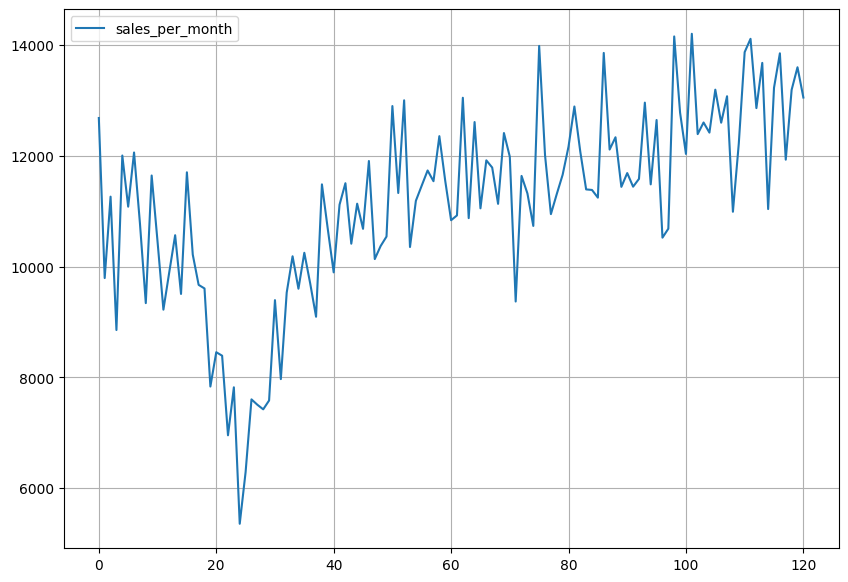

In [9]:
monthly_sales_df.plot(figsize=(10,7))
plt.grid()

In [10]:
# build model with outliers and without ouliers ( remove sales < 9000)


# DF with outliers removed

In [11]:
# use rows where sales > 9000

sales_above_9000_df = monthly_sales_df[ monthly_sales_df['sales_per_month'] > 9000 ]

sales_above_9000_df.head(20)

,sales_per_month
0,12685
1,9793
2,11264
4,12007
5,11083
6,12062
7,10786
8,9340
9,11646
10,10453


In [12]:
sales_above_9000_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sales_per_month,108.0,11566.990741,1259.761812,9094.0,10684.5,11496.5,12415.0,14207.0


In [13]:
# reset index, coz rows were deleted

sales_above_9000_df = sales_above_9000_df.reset_index(drop=True)

sales_above_9000_df, sales_above_9000_df.loc[20], sales_above_9000_df.shape, type(sales_above_9000_df)



(     sales_per_month
 0              12685
 1               9793
 2              11264
 3              12007
 4              11083
 ..               ...
 103            13854
 104            11932
 105            13194
 106            13602
 107            13055
 
 [108 rows x 1 columns],
 sales_per_month    10187
 Name: 20, dtype: int64,
 (108, 1),
 pandas.core.frame.DataFrame)

                 count          mean          std     min      25%      50%  \
sales_per_month  108.0  11566.990741  1259.761812  9094.0  10684.5  11496.5   

                     75%      max  
sales_per_month  12415.0  14207.0  


array([[<AxesSubplot: title={'center': 'sales_per_month'}>]], dtype=object)

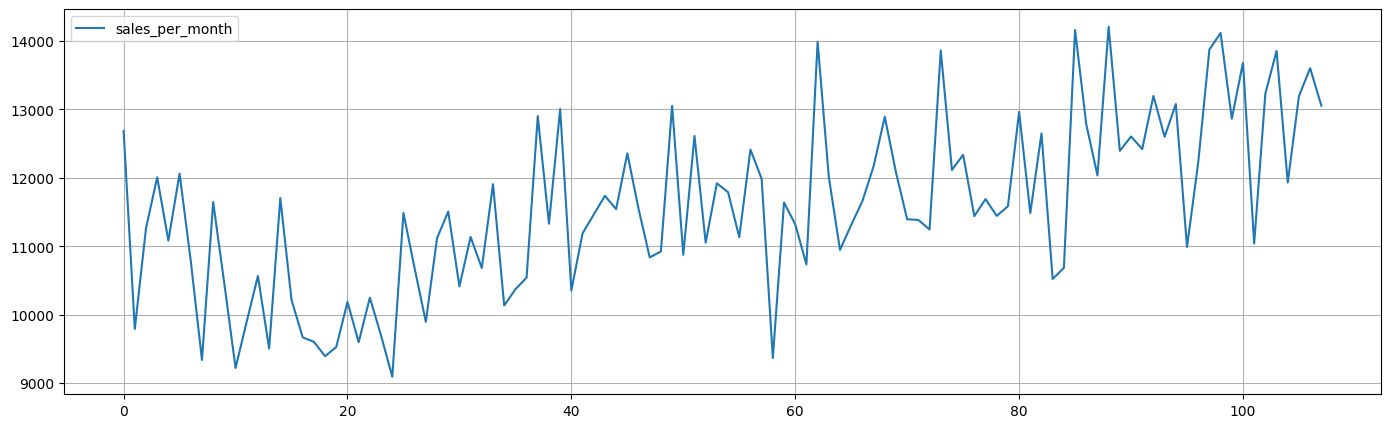

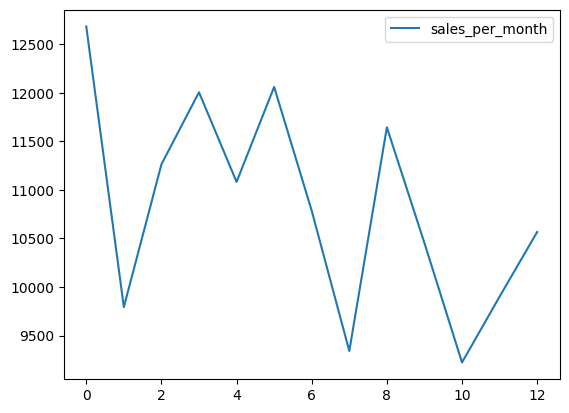

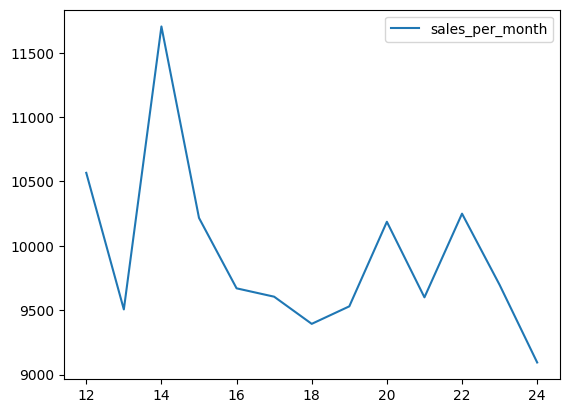

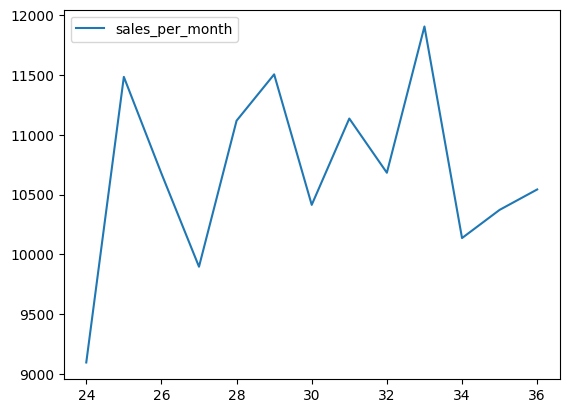

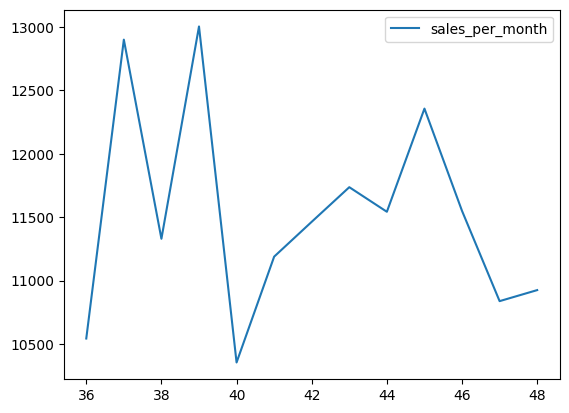

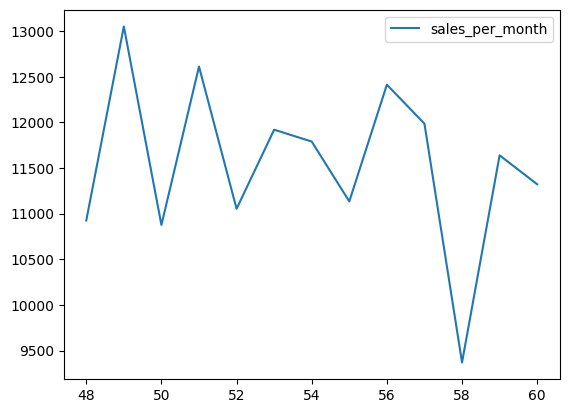

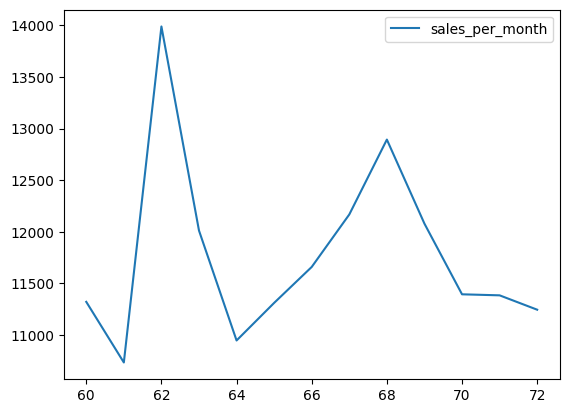

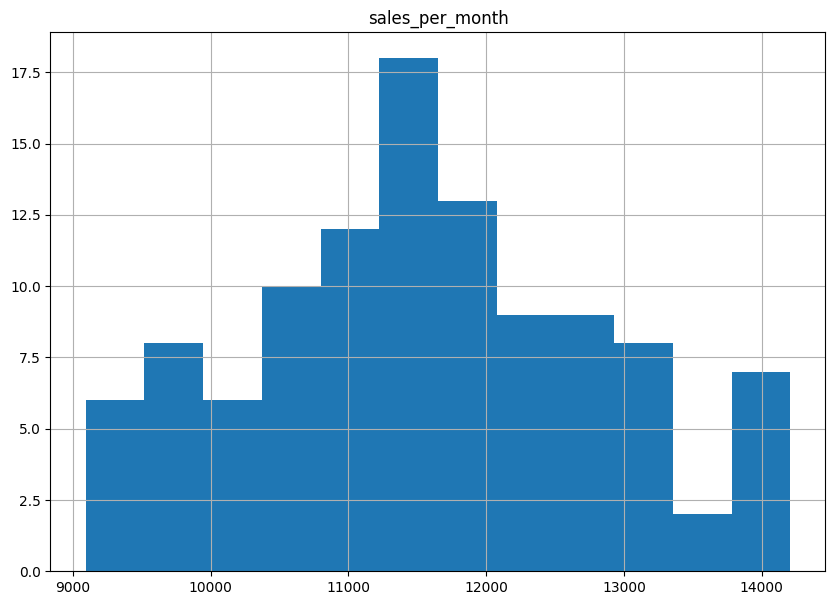

In [14]:
# now with outlier months removed

sales_above_9000_df.plot(figsize=(17,5))
plt.grid()

# sales are trending steadily and slowly upwards over 10 years


sales_above_9000_df.loc[:12].plot()
sales_above_9000_df.loc[12:24].plot()
sales_above_9000_df.loc[24:36].plot()
sales_above_9000_df.loc[36:48].plot()
sales_above_9000_df.loc[48:60].plot()
sales_above_9000_df.loc[60:72].plot()

# sales tend to be higher earlier in the year

print(sales_above_9000_df.describe().transpose())


sales_above_9000_df.hist(bins=12, figsize=(10,7))

# distribution of sales is apread evenly from the mean




In [15]:
sales_above_9000_df.head(10)

,sales_per_month
0,12685
1,9793
2,11264
3,12007
4,11083
5,12062
6,10786
7,9340
8,11646
9,10453


In [16]:
sales_above_9000_df.tail(10)

,sales_per_month
98,14116
99,12864
100,13681
101,11040
102,13232
103,13854
104,11932
105,13194
106,13602
107,13055


# Prepare X and y (features and labels) and feature scale both


In [17]:
# !!! convert to series before passing into df_reshaped() function below - use squeeze()

sales_above_9000_series = sales_above_9000_df.squeeze()

sales_above_9000_series, type(sales_above_9000_series)

(0      12685
 1       9793
 2      11264
 3      12007
 4      11083
        ...  
 103    13854
 104    11932
 105    13194
 106    13602
 107    13055
 Name: sales_per_month, Length: 108, dtype: int64,
 pandas.core.series.Series)

In [18]:
# for LSTM algorithm we need to get the inputs into the correct shape or tensor
# ie a 3D tensor aka a matrix, e.g.:
# [[[1], [2], [3], [4], [5]]]   [6]
# [[[2], [3], [4], [5], [6]]]   [7]
# [[[3], [4], [5], [6], [7]]]   [8]
# where left col contain what we will define as features from df_1, 
# and right col contain what we will define as labels from df_1


def df_reshaped(df, window_size=5):
  # window_size=5 default
    df_to_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_to_np) - window_size): # minus window_size so we do count out of bounds
        row = [ [a] for a in df_to_np[i:i+window_size] ] 
        # add five rows eg 1-5 then 2-6, etc, to X 
        # note a is in brackets and so is row; when we append to X, this creates a 3D tensor
        X.append(row)
        label = df_to_np[i+window_size]
        # add every 6th number to y
        y.append(label)
    return np.array(X), np.array(y)
        

In [19]:
X, y = df_reshaped(sales_above_9000_series, window_size=5) # tweak window_size

X[:10], y[:10]

(array([[[12685],
         [ 9793],
         [11264],
         [12007],
         [11083]],
 
        [[ 9793],
         [11264],
         [12007],
         [11083],
         [12062]],
 
        [[11264],
         [12007],
         [11083],
         [12062],
         [10786]],
 
        [[12007],
         [11083],
         [12062],
         [10786],
         [ 9340]],
 
        [[11083],
         [12062],
         [10786],
         [ 9340],
         [11646]],
 
        [[12062],
         [10786],
         [ 9340],
         [11646],
         [10453]],
 
        [[10786],
         [ 9340],
         [11646],
         [10453],
         [ 9222]],
 
        [[ 9340],
         [11646],
         [10453],
         [ 9222],
         [ 9901]],
 
        [[11646],
         [10453],
         [ 9222],
         [ 9901],
         [10567]],
 
        [[10453],
         [ 9222],
         [ 9901],
         [10567],
         [ 9506]]]),
 array([12062, 10786,  9340, 11646, 10453,  9222,  9901, 10567,  9506,

In [20]:
tf.shape(X), tf.shape(y), type(X)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-28 12:53:33.812077: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-28 12:53:33.812395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([103,   5,   1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([103], dtype=int32)>,
 numpy.ndarray)

In [21]:
# we want to feature scale X and y

sc = StandardScaler()


# first thing is to convert X from a list to a np array

# X = np.asarray(X) # done in df_reshaped() function above


# next we have to reshape X before applying sc

reshaped_X = X.reshape(-1,1)

'''
array_name.reshape()
# reshapes tensors; 
# !!! ( -1, ) indicates reshape to shape (n, ) i.e. to not add any cols
# !!! (-1, 1) indicates reshape to shape (n, n) i.e. to add 1 col
'''

# now we feature scale reshaped_X

X_sc = sc.fit_transform(reshaped_X) 


# then we reshape it back to the original 3D tensor shape

X_sc_2 = X_sc.reshape(103, 5, 1)


# next we have to reshape y before applying sc

reshaped_y = y.reshape(-1,1)


# now we feature scale reshaped_y

y_sc = sc.fit_transform(reshaped_y) 

# no need to reshape y_sc as we only need 2D tensor which it already is


# inspect... 

X_sc_2[:3], X_sc_2.shape, y_sc[:3 ], y_sc.shape


(array([[[ 0.93661194],
         [-1.39519149],
         [-0.20913242],
         [ 0.38994433],
         [-0.35507171]],
 
        [[-1.39519149],
         [-0.20913242],
         [ 0.38994433],
         [-0.35507171],
         [ 0.43429052]],
 
        [[-0.20913242],
         [ 0.38994433],
         [-0.35507171],
         [ 0.43429052],
         [-0.59454114]]]),
 (103, 5, 1),
 array([[ 0.38354501],
        [-0.62496895],
        [-1.76784606]]),
 (103, 1))

In [22]:
X_train, y_train = X_sc_2[:85], y_sc[:85]

X_test, y_test = X_sc_2[85:100], y_sc[85:100]

X_train.shape, X_test.shape, y_train.shape, y_test.shape, tf.shape(X_train) 




((85, 5, 1),
 (15, 5, 1),
 (85, 1),
 (15, 1),
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([85,  5,  1], dtype=int32)>)

# Build LSTM model


In [23]:
'''
Let's avoid using Train Test Split (which randomises the data) because we want to feed LINEAR data into the model (because it's time series based)

X_train, X_test, y_train, y_test = train_test_split(X_sc_2, y_sc, test_size = 0.15, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, tf.shape(X_train)                                                      
'''

"\nLet's avoid using Train Test Split (which randomises the data) because we want to feed LINEAR data into the model (because it's time series based)\n\nX_train, X_test, y_train, y_test = train_test_split(X_sc_2, y_sc, test_size = 0.15, random_state = 0)\n\nX_train.shape, X_test.shape, y_train.shape, y_test.shape, tf.shape(X_train)                                                      \n"

In [24]:
# build model

# now we can build the LSTM model with tensorflow

tf.random.set_seed(42)

lstm_model_1 = keras.Sequential([
    keras.layers.InputLayer((5,1)),
    keras.layers.LSTM(64),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# compile model

lstm_model_1.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=tf.keras.metrics.RootMeanSquaredError() ) 

# fit model

history_1 = lstm_model_1.fit(X_train, y_train, epochs=75, verbose=2)




Epoch 1/75


2022-10-28 12:53:34.241231: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-28 12:53:34.934440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-28 12:53:35.138213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-28 12:53:35.305278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 - 1s - loss: 0.7291 - root_mean_squared_error: 0.8539 - 1s/epoch - 416ms/step
Epoch 2/75
3/3 - 0s - loss: 0.6903 - root_mean_squared_error: 0.8309 - 28ms/epoch - 9ms/step
Epoch 3/75
3/3 - 0s - loss: 0.6393 - root_mean_squared_error: 0.7995 - 27ms/epoch - 9ms/step
Epoch 4/75
3/3 - 0s - loss: 0.6455 - root_mean_squared_error: 0.8034 - 28ms/epoch - 9ms/step
Epoch 5/75
3/3 - 0s - loss: 0.6443 - root_mean_squared_error: 0.8027 - 26ms/epoch - 9ms/step
Epoch 6/75
3/3 - 0s - loss: 0.6100 - root_mean_squared_error: 0.7810 - 27ms/epoch - 9ms/step
Epoch 7/75
3/3 - 0s - loss: 0.6094 - root_mean_squared_error: 0.7807 - 28ms/epoch - 9ms/step
Epoch 8/75
3/3 - 0s - loss: 0.6100 - root_mean_squared_error: 0.7810 - 27ms/epoch - 9ms/step
Epoch 9/75
3/3 - 0s - loss: 0.5970 - root_mean_squared_error: 0.7726 - 30ms/epoch - 10ms/step
Epoch 10/75
3/3 - 0s - loss: 0.5921 - root_mean_squared_error: 0.7695 - 35ms/epoch - 12ms/step
Epoch 11/75
3/3 - 0s - loss: 0.5882 - root_mean_squared_error: 0.7669 - 31ms/e

Text(0.5, 0, 'epochs')

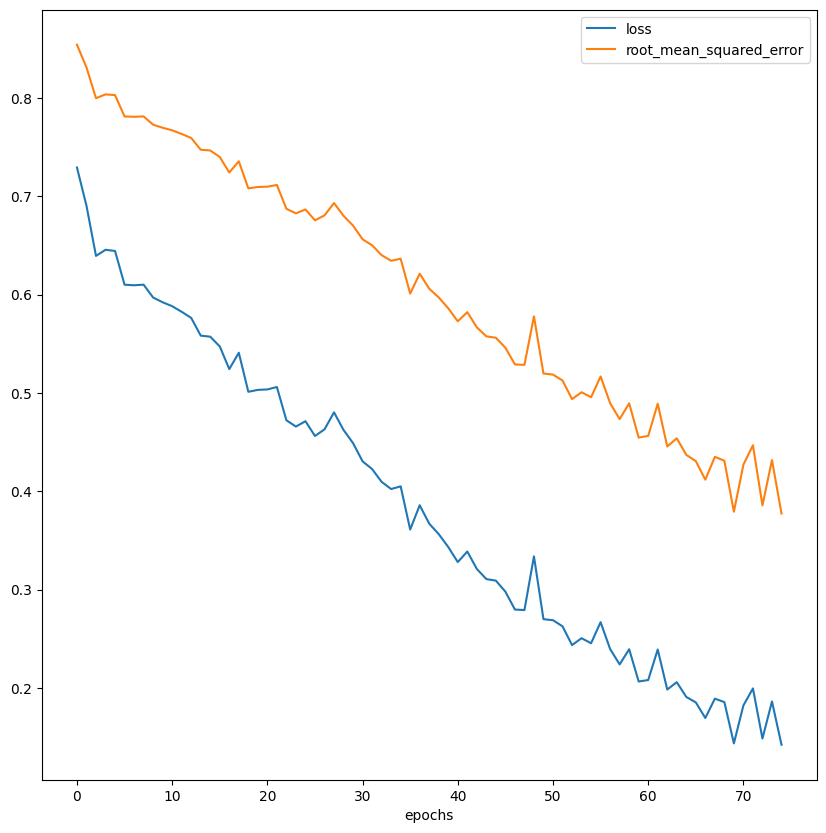

In [25]:
pd.DataFrame(history_1.history).plot(figsize=(10,10))
plt.xlabel('epochs')

# Evaluate the train data predictions of the model (training data of 85 rows)

2022-10-28 12:53:38.351909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-28 12:53:38.407355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[[11443.568]
 [10994.85 ]
 [10092.902]
 [12011.757]
 [10737.328]
 [ 9910.264]
 [10401.517]
 [10329.273]
 [ 9730.067]
 [11361.41 ]] [[12062.]
 [10786.]
 [ 9340.]
 [11646.]
 [10453.]
 [ 9222.]
 [ 9901.]
 [10567.]
 [ 9506.]
 [11704.]] (85, 1) (85, 1)


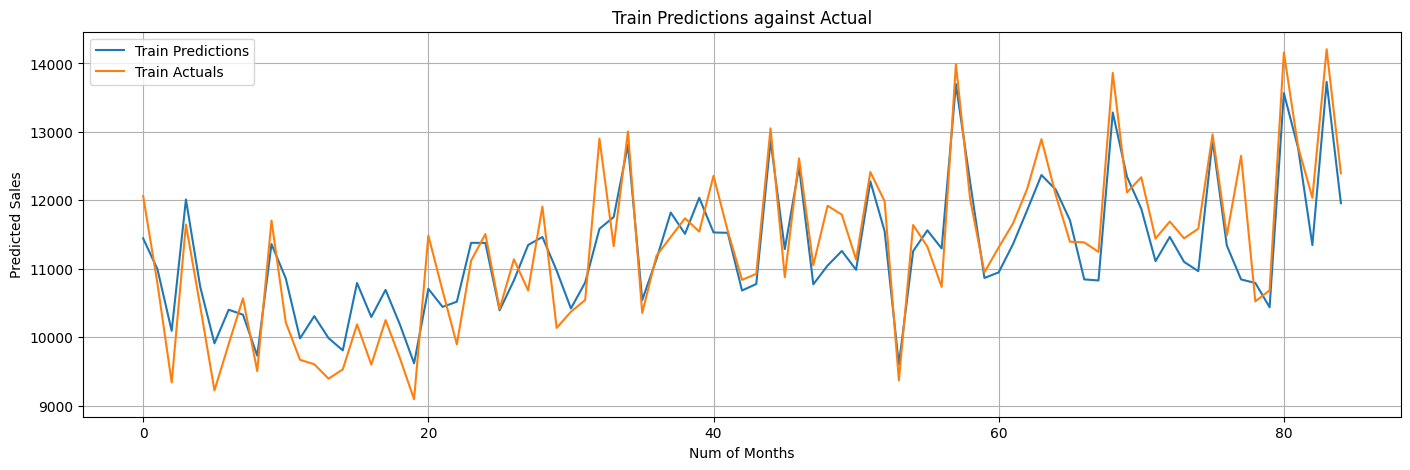

In [26]:
ypred_train = lstm_model_1.predict(X_train)


# inverse transform ypred_train and y_test

ypred_train_inv_sc = sc.inverse_transform(ypred_train)

ytrain_inv_sc = sc.inverse_transform(y_train)

print(ypred_train_inv_sc[:10], ytrain_inv_sc[:10], ypred_train_inv_sc.shape, ytrain_inv_sc.shape)
# from y[:10] in cell 73... 12062, 10786,  9340, 11646, 10453,  9222,  9901, 10567,  9506, 11704
# matches the inverse transformed values

# reshape to make it plottable

ypred_train_inv_sc = ypred_train_inv_sc.reshape(-1,)

ytrain_inv_sc = ytrain_inv_sc.reshape(-1,)


# create a pd dataframe

test_results = pd.DataFrame(data={'Train Predictions': ypred_train_inv_sc, 'Train Actuals': ytrain_inv_sc})

# plot results

test_results['Train Predictions'].plot(figsize=(17,5))
test_results['Train Actuals'].plot(figsize=(17,5))
plt.title('Train Predictions against Actual')
plt.ylabel('Predicted Sales')
plt.xlabel('Num of Months')
plt.legend()
plt.grid()

In [27]:
# FORECAST ACCURACY ON TRAINING DATA (85 ROWS)

# Our model has a root mean squared error of 0.4 and you can see from the plot above that predictions are reasonably accurate.
# !!! Values of plot are slightly shifted to the RIGHT, compared to the plot of the full dataframe: "sales_above_9000_df", 
# because these predictions and actuals begin from month 6 (window_size=5)

# Evaluate the test data predictions of the model (test data of 15 rows)

In [28]:
lstm_model_1.evaluate(X_test, y_test) 
# [1.1788996458053589, 1.0857714414596558] window=6
# [0.6930471062660217, 0.8324944972991943] window=5
# [2.0292670726776123, 1.4245234727859497] window=4
# [1.5866310596466064, 1.259615421295166] window=3
# [2.321795701980591, 1.523743987083435] window=2


1/1 [==============================] - 0s 281ms/step - loss: 2.1268 - root_mean_squared_error: 1.4583


2022-10-28 12:53:38.829471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-28 12:53:38.900653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[2.126784086227417, 1.4583497047424316]

In [29]:
y_pred = lstm_model_1.predict(X_test)

y_pred


array([[ 0.8134999 ],
       [-0.28305197],
       [ 0.33577585],
       [-0.43883562],
       [-0.22147797],
       [-0.56235313],
       [ 0.13084723],
       [-0.993495  ],
       [-1.1648366 ],
       [-0.5084176 ],
       [ 1.8151894 ],
       [ 0.43759823],
       [ 1.4572654 ],
       [-0.5109222 ],
       [ 0.25389862]], dtype=float32)

In [30]:
y_pred_inv_sc = sc.inverse_transform(y_pred)

y_pred_inv_sc

#inverted_result = oe.inverse_transform(test_set)

array([[12605.991],
       [11218.603],
       [12001.562],
       [11021.501],
       [11296.508],
       [10865.224],
       [11742.279],
       [10319.73 ],
       [10102.944],
       [10933.464],
       [13873.356],
       [12130.39 ],
       [13420.501],
       [10930.295],
       [11897.968]], dtype=float32)

In [31]:
y_test_inv_sc = sc.inverse_transform(y_test)

y_test_inv_sc

array([[12604.],
       [12421.],
       [13197.],
       [12600.],
       [13078.],
       [10991.],
       [12222.],
       [13875.],
       [14116.],
       [12864.],
       [13681.],
       [11040.],
       [13232.],
       [13854.],
       [11932.]])

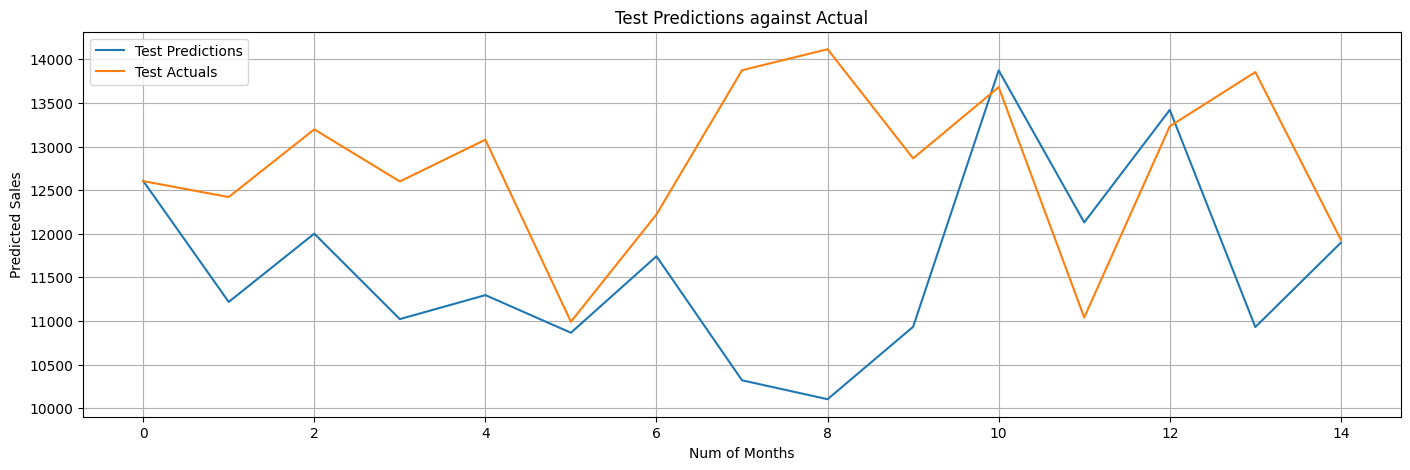

In [32]:
# reshape y_pred_inv_sc and other to make it plottable

y_pred_inv_sc = y_pred_inv_sc.reshape(-1,)

y_test_inv_sc = y_test_inv_sc.reshape(-1,)


# create a pd dataframe

test_results = pd.DataFrame(data={'Test Predictions': y_pred_inv_sc, 'Test Actuals': y_test_inv_sc})

# plot results

test_results['Test Predictions'].plot(figsize=(17,5))
test_results['Test Actuals'].plot(figsize=(17,5))
plt.title('Test Predictions against Actual')
plt.ylabel('Predicted Sales')
plt.xlabel('Num of Months')
plt.legend()
plt.grid()


In [33]:
# explore the accuracy of the model (preds versus actuals, for test data)
# find the difference of preds and actuals for each of the 15 months

difference = []

def diff(arr1, arr2):
  for i in range(len(arr1)):
    difference.append(arr1[i] - arr2[i])

diff(y_pred_inv_sc, y_test_inv_sc)

difference_df=pd.DataFrame(difference)

difference_abs = abs(difference_df) # difference in absolute numbers, ie - or +

print(difference_abs, type(difference_abs))

print()


# average of differences: 
print(difference_abs.mean()) # 987

#print(difference_abs.describe()) # same mean result

print()


# mean of y_test sales (groundtruth sales for 15 months) is... 

print(y_test_inv_sc.mean()) # 12780

print(987/12780 * 100) # 7.7%

# HOW ACCURATE IS OUR MODEL?
# Average of differences between forecasted and actual sales for last 15 months of the dataset is 987 units.
# Average monthly sales for the same 15 months is 12780 units.
# As a description of accuracy, the percentage of average of differences over average monthly sales
# (987/12780*100) is 7.7%, which means forecasts are off by 7.7% on average.
# When bearing in mind that our model was trained on only 85 rows of data, 
# this is an acceptable accuracy.
# We also note that model tends to forecast lower sales than actual. 


              0
0      1.991211
1   1202.397461
2   1195.438477
3   1578.499023
4   1781.492188
5    125.776367
6    479.720703
7   3555.269531
8   4013.055664
9   1930.536133
10   192.356445
11  1090.389648
12   188.500977
13  2923.705078
14    34.032227 <class 'pandas.core.frame.DataFrame'>

0    1352.877409
dtype: float64

12780.466666666667
7.723004694835681


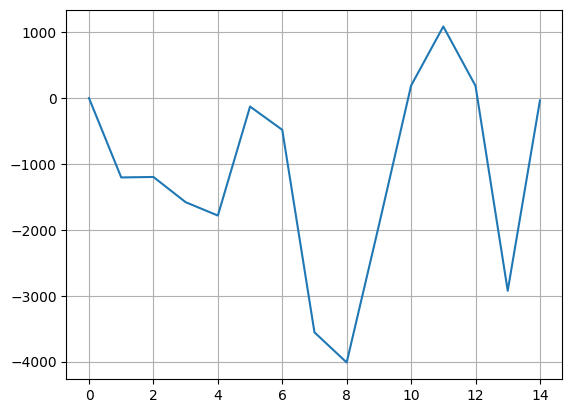

In [34]:
plt.plot(difference)
plt.grid()

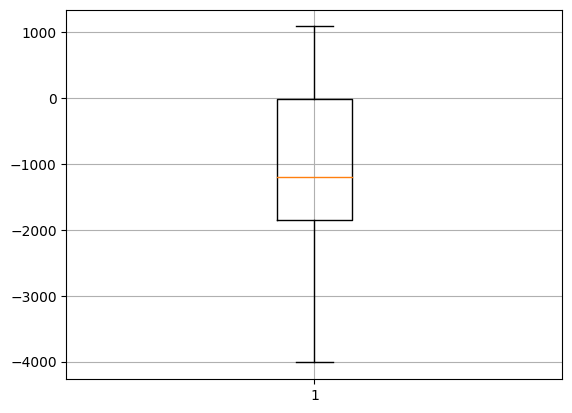

In [35]:
plt.boxplot(difference, notch=None, vert=None, patch_artist=None, widths=None) # difference is a list
plt.grid()


In [36]:
# overall Model tendency is to predict/forecast lower sales. NB 0 = precise forecast  
# expect an average sales of 700 units more per month, on top of the forecast

# Pass an instance of new data into model to forecast sales; then do the same with the serialised model; and compare results

In [37]:
'''newdata_series = sales_above_9000_series.loc[100:108]

newdata_series'''

'newdata_series = sales_above_9000_series.loc[100:108]\n\nnewdata_series'

In [38]:
'''# take 5 rows for our forecast

fresh_data = newdata_series[:5]

fresh_data, type(fresh_data)'''

'# take 5 rows for our forecast\n\nfresh_data = newdata_series[:5]\n\nfresh_data, type(fresh_data)'

In [39]:
'''# !!! we cannot use df_reshaped() function we defined earlier to create 3D tensor, here


# convert series to numpy array

X2 = fresh_data.to_numpy() 

#print(X2.shape) # (5,)


# we have to reshape X2 before applying sc

X2 = X2.reshape(-1,1)

print(X2)

# feature scale X2 - not fit_transform()

X2_sc = sc.transform(X2)


# reshape X2 to usable 3D tensor we can pass into Model

X2_sc = X2_sc.reshape(-1, 5, 1)

'''

'# !!! we cannot use df_reshaped() function we defined earlier to create 3D tensor, here\n\n\n# convert series to numpy array\n\nX2 = fresh_data.to_numpy() \n\n#print(X2.shape) # (5,)\n\n\n# we have to reshape X2 before applying sc\n\nX2 = X2.reshape(-1,1)\n\nprint(X2)\n\n# feature scale X2 - not fit_transform()\n\nX2_sc = sc.transform(X2)\n\n\n# reshape X2 to usable 3D tensor we can pass into Model\n\nX2_sc = X2_sc.reshape(-1, 5, 1)\n\n'

In [40]:
#!!!

input_test_1 = np.array([[9793, 11264, 12007, 11083, 12062]]).reshape(5,1)

print(input_test_1)

test_input = sc.transform(input_test_1)

print(test_input)

test_input_ready = test_input.reshape(1,5,1)

print(test_input_ready)


[[ 9793]
 [11264]
 [12007]
 [11083]
 [12062]]
[[-1.4098078 ]
 [-0.2471714 ]
 [ 0.34007458]
 [-0.39022863]
 [ 0.38354501]]
[[[-1.4098078 ]
  [-0.2471714 ]
  [ 0.34007458]
  [-0.39022863]
  [ 0.38354501]]]


In [41]:
y_pred2 = lstm_model_1.predict(test_input_ready)

y_pred2


array([[-0.3740844]], dtype=float32)

In [42]:
# inverse transform pred 

y_pred2 = sc.inverse_transform(y_pred2)

y_pred2

array([[11103.426]], dtype=float32)

In [43]:
# compare forecasted sales with groundtruth sales of 13194 from ori series


difference_y_pred2 = (12298 - 13194) 

print(difference_y_pred2 ) # -896


percentage_diff = abs((12298 - 13194) / 13194 * 100)

print(percentage_diff) # 6.8 percent difference




-896
6.790965590419888


# Learnings

EXECUTIVE SUMMARY OF TIME SERIES FORECAST MODEL

We wanted to build a demo model that can forecast car sales in Norway. The model, after given sales for months 1 through 5 as input, should be able to forecast the 6th month's sales. 

A dataset of Norwegian monthly nationwide car sales from start of 2007 to end of 2016 - 10 years of sales data - was used in model development. 

We have successfully created a univariate (one type of input variable only i.e. sales per month), one-step (i.e. forecast the following month's sales if five preceeding months are given) time series forecasting model, with an LSTM deep learning algorithm. 

Average difference between forecasted and actual sales per month is about 987 units. Do take note that we are only using 85 rows as training data from the dataset. 


HOW ACCURATE IS OUR MODEL, BASED ON TEST DATA?

Average of differences between forecasted and actual sales for last 15 months of the dataset is 987 units. Average monthly sales for the same 15 months is 12780 units. 

As a description of accuracy, the percentage of difference average over actual average (987/12780*100) is 7.7%, which means forecasts are off by only 7.7% on average. When bearing in mind that our model was trained on only 85 rows of data, this is an acceptable accuracy.

From the plot below, we can see that our model is generally in step with the rising and falling of sales over a 15 month period.


MODEL DEVELOPMENT NOTES

Data must be in Series format before they can be passed into df_reshaped() which converts the data into the usable/required X and y format. X shape = (n, window_size, 1) and y shape = (n, 1).

Tensors are then feature scaled. Note that both X and y are scaled, not just X.
I do think we should feature scale the dataframe before we reshape them into usable tensors. Seems less complicated to do this.

When we want to pass in fresh, unseen data to obtain a forecast, we do not use the  df_reshaped() function to turn features into 3D tensors, we use numpy's .reshape(-1, 5, 1) -- where -1 indicates no change to SAMPLES, 5 is the window_size or TIMESTEPS of our model and 1 is the number of FEATURES we want to predict.



# Serialise Model with Keras, not Pickle. Pickle the scaler. Then use both to make a prediction.



In [44]:
# https://www.tensorflow.org/tutorials/keras/save_and_load


In [45]:
# Save the entire model as a SavedModel into a specified folder !!! Colab code

#lstm_model_1.save('/content/drive/MyDrive/WORK/DATASCI+ML/fp_ai/dl_forecast_model_dev_and_deployment_files/car_sales_forecast_model_dev/my_model2')

In [46]:
# SAVE WEIGHTS (creates a new folder as per below) !!! Colab code 

#lstm_model_1.save_weights('/content/drive/MyDrive/WORK/DATASCI+ML/fp_ai/dl_forecast_model_dev_and_deployment_files/car_sales_forecast_model_dev/weights_folder3/my_weights')


In [47]:
'''# SAVE SCALER AND MODEL AS PICKLE FILE ## we have a saved .pkl scaler file in the folder

pickle.dump(sc, open('scaler.pkl', 'wb'))

pickle.dump(lstm_model_1, open("forecast_model.pkl", "wb")) 
'''

'# SAVE SCALER AND MODEL AS PICKLE FILE ## we have a saved .pkl scaler file in the folder\n\npickle.dump(sc, open(\'scaler.pkl\', \'wb\'))\n\npickle.dump(lstm_model_1, open("forecast_model.pkl", "wb")) \n'

In [48]:
'''# LOAD PICKLE SCALER AND MODEL

forecast_model_pkl = pickle.load(open('/content/drive/MyDrive/WORK/DATASCI+ML/fp_ai/dl_forecast_model_dev_and_deployment_files/car_sales_forecast_model_dev/forecast_model.pkl', 'rb'))
'''
scaler_pkl = pickle.load(open('/Users/joellim/Desktop/coda_work_mac_2022/car_sales_forecast_model_dev/scaler.pkl', 'rb'))


/Users/joellim/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [49]:
# SCALE NEW DATA

#input_test_1 = np.array([[13681, 11040, 13232, 13854, 11932]]).reshape(5,1) # note we reshape the np array to (5,1), currently (1,5)
input_test_1 = np.array([[9793, 11264, 12007, 11083, 12062]]).reshape(5,1) # note we reshape the np array to (5,1), currently (1,5)
#input_test_1 = np.array([[11264, 12007, 11083, 12062, 10786]]).reshape(5,1) # note we reshape the np array to (5,1), currently (1,5)
#input_test_1 = np.array([[10453, 9222, 9901, 10567, 9506]]).reshape(5,1) # note we reshape the np array to (5,1), currently (1,5)

input_test_1_sc = scaler_pkl.transform(input_test_1)

input_test_1_sc


array([[-1.4098078 ],
       [-0.2471714 ],
       [ 0.34007458],
       [-0.39022863],
       [ 0.38354501]])

In [50]:
# CONVERT TO 3D TENSOR
# note final shape before passing into model is (1,5,1)
'''
[[[1], 
  [2], 
  [3], 
  [4], 
  [5]]] 
'''

input_test_1_sc = input_test_1_sc.reshape(1,5,1)

input_test_1_sc

array([[[-1.4098078 ],
        [-0.2471714 ],
        [ 0.34007458],
        [-0.39022863],
        [ 0.38354501]]])

In [51]:
# LOAD .PB MODEL

saved_forecast_model = tf.keras.models.load_model('/Users/joellim/Desktop/coda_work_mac_2022/car_sales_forecast_model_dev/my_model')

#saved_forecast_model.summary()

In [52]:
# LOAD WEIGHTS # not necessary to use this as weights are saved with SavedModel 

# saved_forecast_model.load_weights('/content/drive/MyDrive/WORK/DATASCI+ML/fp_ai/dl_forecast_model_dev_and_deployment_files/car_sales_forecast_model_dev/weights_folder3/my_weights')

In [53]:
# PREDICT WITH SERIALISED MODEL

test_pred = saved_forecast_model.predict(input_test_1_sc)

test_pred

# output is the same as pred with non-pkl model!


2022-10-28 12:53:43.943028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-28 12:53:43.997904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[-0.6634495]], dtype=float32)

In [54]:
# inverse scale output

test_pred_inv_scaled = sc.inverse_transform(test_pred)

test_pred_inv_scaled

array([[10737.313]], dtype=float32)